In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import os
import time

from util import *
from data_loader import * 
import scdd as sd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
data = load_10x_1k()
sc.pp.filter_genes(data,min_counts=data.shape[0])
gene_list = list(data.var_names)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# unit test of  sd.sf

Nr=9049
size factor [0.33415291 0.33439954 0.33661929 4.38312716 6.03265007 7.42727757]


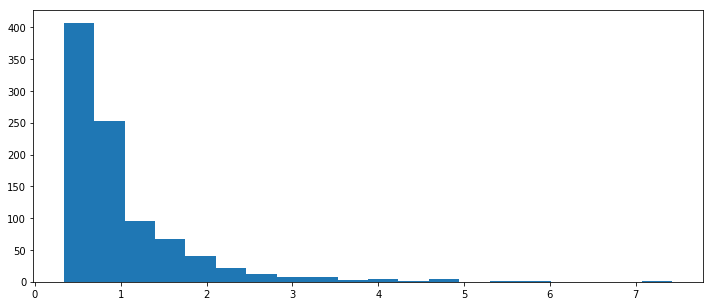

first 5 genes:  [0.81493974 0.49040034 0.44973624 1.1602532  1.3858948 ]


In [24]:
sf = sd.dd_size_factor(data)
print('first 5 genes: ', sf[0:5])

In [25]:
## 
x = np.array(data.X.todense(),dtype=int)
temp = x.mean(axis=1)/x.mean()
print(temp[0:5])

[0.81493976 0.49040036 0.44973625 1.16025322 1.38589484]


# unit test of  dd_moment_anndata

In [28]:
gene_list.index('Mrpl15')

0

In [30]:
M_ml,M_dd = sd.dd_1d_moment(data,size_factor=None,verbose=False,k=4,Nr_normalize=False)
print(M_ml[:,0])
print(M_dd[:,0])

[  1.60257787   5.74221267  31.72502685 243.783029  ]
[  1.60257787   4.1396348   17.70354458 106.98174006]


In [31]:
g1 = np.array(data[:,'Mrpl15'].X,dtype=int)

for i in range(4):
    print('ml',i+1,np.mean(g1**(i+1)/sf**(i+1)))
    
print('dd',1,np.mean(g1))
print('dd',2,np.mean(g1**2-g1))
print('dd',3,np.mean(g1**3-3*g1**2+2*g1))
print('dd',4,np.mean(g1**4-6*g1**3+11*g1**2-6*g1))

ml 1 1.638904403876617
ml 2 5.0452815569016085
ml 3 19.933065542745595
ml 4 96.84792931441598
dd 1 1.602577873254565
dd 2 4.139634801288937
dd 3 17.703544575725026
dd 4 106.98174006444683


In [19]:
size_factor

<function util.size_factor>